In [1]:
from models import *
from train import *
from plot import *
from model_baseline import BaseLineNet
from model_siamese1 import SiameseConvNet1
from model_siamese2 import SiameseConvNet2

In [2]:
baseline = BaseLineNet()
siamese1 = SiameseConvNet1()
siamese2 = SiameseConvNet2()

In [3]:
train_input, train_target, train_classes, test_input, test_target, test_classes = generate_pair_sets(1000)

In [4]:

# with torch.no_grad():
#     # train the baseline model
#     pred_leq, _ = baseline(train_input)

In [5]:
summary(baseline, input_size=(1, 2, 14, 14))

Layer (type:depth-idx)                   Output Shape              Param #
BaseLineNet                              [1]                       --
├─Linear: 1-1                            [1, 150]                  58,950
├─Linear: 1-2                            [1, 80]                   12,080
├─Linear: 1-3                            [1, 20]                   1,620
├─Linear: 1-4                            [1, 1]                    21
Total params: 72,671
Trainable params: 72,671
Non-trainable params: 0
Total mult-adds (M): 0.07
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.29
Estimated Total Size (MB): 0.29

In [6]:
device = torch.device('cpu') # torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baseline.to(device)
nb_epochs = 100
mini_batch_size = 100
# for the baseline model
start = time.perf_counter()
info_cycle_base = train_model(baseline,
                            train_input, train_target, train_classes,
                            nb_epochs=nb_epochs, mini_batch_size=mini_batch_size,
                            criterion_classes=nn.CrossEntropyLoss(), criterion_leq=nn.BCELoss(),
                            optimizer= torch.optim.SGD(baseline.parameters(), lr=4e-2),
                            weight_loss_classes=0.0, weight_loss_pairs=1.0,
                            freeze_epochs=0,
                            one_hot_classes=True, one_hot_leq=False,
                            verbose=False,
                            test_input=test_input, test_target=test_target, test_classes=test_classes,
                            device=device)
end = time.perf_counter()
print(f'Time baseline: {end - start:.2f}s')

# for the siamese model 1
start = time.perf_counter()
info_cycle_s1 = train_model(siamese1,
                            train_input, train_target, train_classes,
                            nb_epochs=nb_epochs, mini_batch_size=mini_batch_size,
                            criterion_classes=nn.CrossEntropyLoss(), criterion_leq=nn.BCELoss(),
                            optimizer= torch.optim.SGD(siamese1.parameters(), lr=3e-3),
                            weight_loss_classes=0.1, weight_loss_pairs=0.9,
                            freeze_epochs=0,
                            one_hot_classes=True, one_hot_leq=False,
                            verbose=False,
                            test_input=test_input, test_target=test_target, test_classes=test_classes,
                            device=device)
end = time.perf_counter()
print(f'Time siamese1: {end - start:.2f}s')

# for the siamese model 2
start = time.perf_counter()
info_cycle_s2 = train_model(siamese2,
                            train_input, train_target, train_classes,
                            nb_epochs=nb_epochs, mini_batch_size=mini_batch_size,
                            criterion_classes=nn.CrossEntropyLoss(), criterion_leq=nn.BCEWithLogitsLoss(),
                            optimizer= torch.optim.SGD(siamese2.parameters(), lr=1e-3),
                            weight_loss_classes=1., weight_loss_pairs=0.,
                            freeze_epochs=0,
                            one_hot_classes=True, one_hot_leq=False,
                            verbose=False,
                            test_input=test_input, test_target=test_target, test_classes=test_classes,
                            device=device)
end = time.perf_counter()
print(f'Time siamese2: {end - start:.2f}s')


Time baseline: 1.99s
Time siamese1: 43.58s
Time siamese2: 44.49s


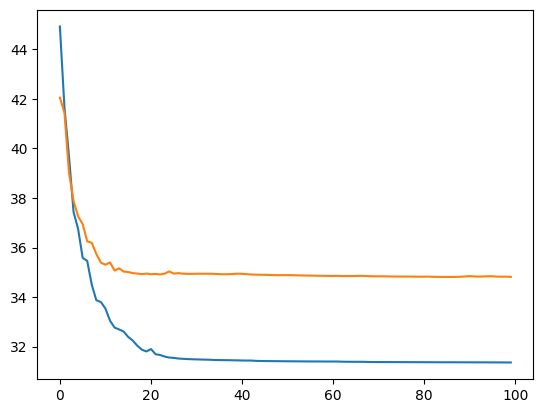

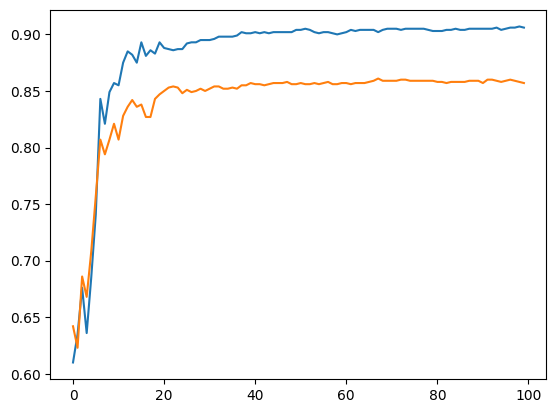

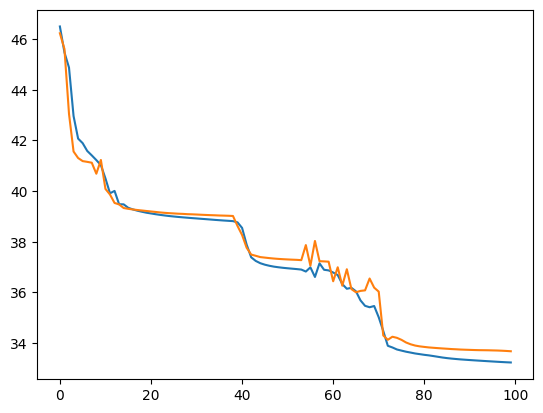

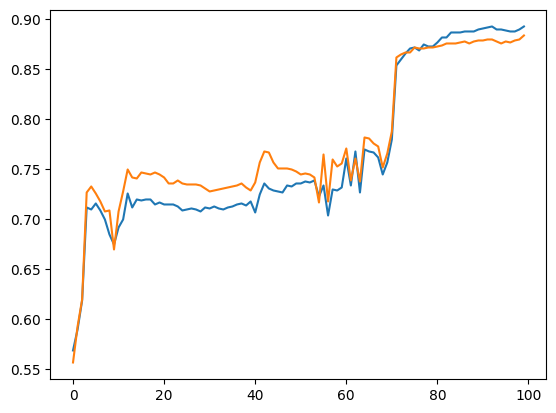

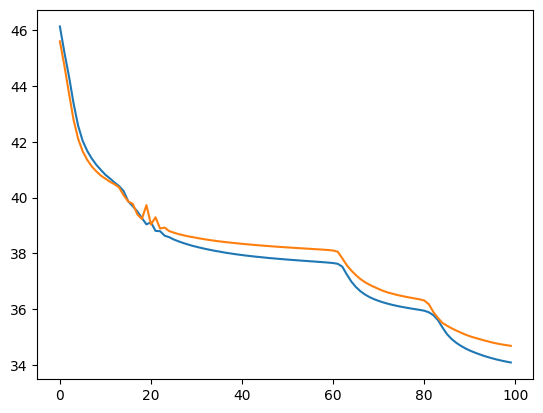

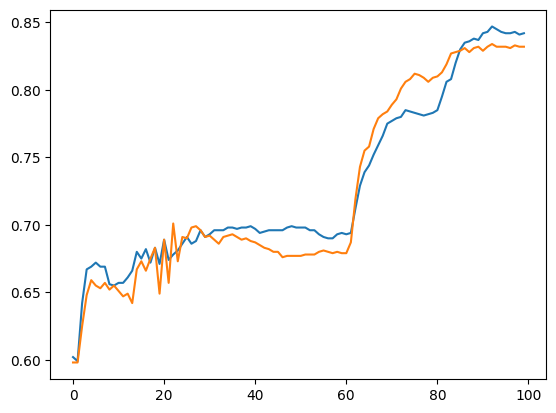

In [7]:
import matplotlib.pyplot as plt

# baseline
plt.plot(info_cycle_base['train']['loss'])
plt.plot(info_cycle_base['test']['loss'])
plt.show()

# plt.plot(info_cycle_base['train']['acc_classes'])
# plt.plot(info_cycle_base['test']['acc_classes'])
# plt.show()

# plt.plot(info_cycle_base['train']['acc_leq'])
# plt.plot(info_cycle_base['test']['acc_leq'])
# plt.show()

plt.plot(info_cycle_base['train']['acc_naive'])
plt.plot(info_cycle_base['test']['acc_naive'])
plt.show()

# siamese1
plt.plot(info_cycle_s1['train']['loss'])
plt.plot(info_cycle_s1['test']['loss'])
plt.show()

# plt.plot(info_cycle_s1['train']['acc_classes'])
# plt.plot(info_cycle_s1['test']['acc_classes'])
# plt.show()

# plt.plot(info_cycle_s1['train']['acc_leq'])
# plt.plot(info_cycle_s1['test']['acc_leq'])
plt.show()

plt.plot(info_cycle_s1['train']['acc_naive'])
plt.plot(info_cycle_s1['test']['acc_naive'])
plt.show()

# siamese2
plt.plot(info_cycle_s2['train']['loss'])
plt.plot(info_cycle_s2['test']['loss'])
plt.show()

# plt.plot(info_cycle_s2['train']['acc_classes'])
# plt.plot(info_cycle_s2['test']['acc_classes'])
# plt.show()

# plt.plot(info_cycle_s2['train']['acc_leq'])
# plt.plot(info_cycle_s2['test']['acc_leq'])
# plt.show()

plt.plot(info_cycle_s2['train']['acc_naive'])
plt.plot(info_cycle_s2['test']['acc_naive'])
plt.show()